In [1]:
# pip install gensim

In [9]:
from jupyterthemes import jtplot

jtplot.style('monokai')

In [2]:
%config Completer.use_jedi = False


### Simple topic identification

In [3]:
f = open('data/Introduction to NLP in python/monty_python.txt', 'r')
holy_grail = f.read()

scene_one = holy_grail.split('SCENE')[1]


In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize

sentences = sent_tokenize(scene_one)

tokenized_sent = word_tokenize(scene_one)

unique_tokens = set(word_tokenize(scene_one))

unique_tokens

{'!',
 '#',
 "'",
 "'d",
 "'em",
 "'m",
 "'re",
 "'s",
 "'ve",
 ',',
 '--',
 '.',
 '...',
 '1',
 '2',
 ':',
 '?',
 'A',
 'ARTHUR',
 'African',
 'Am',
 'Are',
 'Arthur',
 'Britons',
 'But',
 'Camelot',
 'Court',
 'England',
 'European',
 'Found',
 'Halt',
 'I',
 'In',
 'It',
 'KING',
 'King',
 'Listen',
 'Mercea',
 'No',
 'Not',
 'Oh',
 'Patsy',
 'Pendragon',
 'Please',
 'Pull',
 'Ridden',
 'SOLDIER',
 'Saxons',
 'So',
 'Supposing',
 'That',
 'The',
 'They',
 'Uther',
 'Wait',
 'We',
 'Well',
 'What',
 'Where',
 'Who',
 'Whoa',
 'Will',
 'Yes',
 'You',
 '[',
 ']',
 'a',
 'agree',
 'air-speed',
 'all',
 'am',
 'an',
 'and',
 'anyway',
 'are',
 'ask',
 'at',
 'back',
 'bangin',
 'be',
 'beat',
 'bird',
 'breadth',
 'bring',
 'but',
 'by',
 'carried',
 'carry',
 'carrying',
 'castle',
 'climes',
 'clop',
 'coconut',
 'coconuts',
 'could',
 'course',
 'court',
 'covered',
 'creeper',
 'defeator',
 'do',
 'does',
 'dorsal',
 'empty',
 'every',
 'feathers',
 'five',
 'fly',
 'forty-three',
 '

In [5]:
import re

match = re.search('coconuts', scene_one)

print(match.start(), match.end())

575 583


In [6]:
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

In [7]:
import matplotlib.pyplot as plt

In [13]:
from collections import Counter

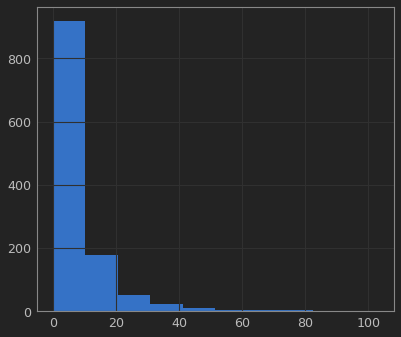

In [10]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, r"\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

In [14]:
f = open('data/Introduction to NLP in python/wiki_text_debugging.txt', 'r')
article = f.read()

f2 = open('data/Introduction to NLP in python/stopwords.txt', 'r')
english_stops = f2.read().split('\n')


tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 66), ('to', 63), ('a', 60), ('``', 47), ('in', 44), ('and', 41)]


In [15]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))


[('debugging', 40), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


In [20]:
import os
PATH = 'data/Introduction to NLP in python/'
files = os.listdir(PATH)
wiki_articles_raw = [open(PATH+file, 'r').read().lower() for file in files if 'wiki' in file]
len(wiki_articles_raw)

12

In [21]:
tokens = [word_tokenize(article) for article in wiki_articles_raw]

tokens

[["'",
  "''",
  'exception',
  'handling',
  "''",
  "'",
  'is',
  'the',
  'process',
  'of',
  'responding',
  'to',
  'the',
  'occurrence',
  ',',
  'during',
  'computation',
  ',',
  'of',
  '``',
  'exceptions',
  "''",
  '–',
  'anomalous',
  'or',
  'exceptional',
  'conditions',
  'requiring',
  'special',
  'processing',
  '–',
  'often',
  'changing',
  'the',
  'normal',
  'flow',
  'of',
  'computer',
  'program|program',
  'execution',
  '(',
  'computing',
  ')',
  '|execution',
  '.',
  'it',
  'is',
  'provided',
  'by',
  'specialized',
  'programming',
  'language',
  'constructs',
  'or',
  'computer',
  'hardware',
  'mechanisms',
  '.',
  'in',
  'general',
  ',',
  'an',
  'exception',
  'breaks',
  'the',
  'normal',
  'flow',
  'of',
  'execution',
  'and',
  'executes',
  'a',
  'pre-registered',
  '``',
  'exception',
  'handler',
  "''",
  '.',
  'the',
  'details',
  'of',
  'how',
  'this',
  'is',
  'done',
  'depends',
  'on',
  'whether',
  'it',
  '

In [22]:
english_stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [23]:
clean_articles = []
for article in tokens:
    alpha_only = [t for t in article if t.isalpha()]
    lower = [t.lower() for t in alpha_only]
    no_stop = [t for t in lower if t not in english_stops]
    clean_articles.append(no_stop)
    

    

In [24]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(clean_articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in clean_articles]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])



computer
[(20, 2), (24, 1), (28, 1), (35, 4), (36, 1), (38, 1), (43, 5), (49, 1), (50, 1), (60, 4)]


In [25]:
from collections import defaultdict
import itertools

total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
    
# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

computer 598
software 450
cite 322
ref 259
code 235


In [26]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus)

tfidf_weights = tfidf[corpus[1]]

# tfidf_weights[:5]

sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:10]:
    print(dictionary.get(term_id), weight)

reverse 0.5469505229447056
infringement 0.2033630531933049
engineering 0.17853974914598997
interoperability 0.13557536879553658
missile 0.1186284476960945
knowledge 0.10399893000630442
learning 0.08553787905772492
chikofsky 0.08473460549721036
competitor 0.08473460549721036
directive 0.08473460549721036


### Named-entity recognition (NER)

In [27]:
import nltk

article = open('data/Introduction to NLP in python/uber_apple.txt', 'r').read()

sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


In [28]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

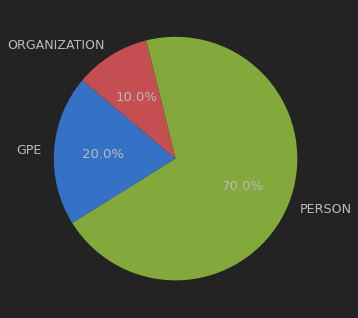

In [29]:
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

In [30]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load("en_core_web_sm", exclude=['tagger', 'parser', 'matcher'])

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


[W108] The rule-based lemmatizer did not find POS annotation for the token '﻿The'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'taxi'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token '-'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'hailing'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'company'. Check that your pipeline includes components that assign token.pos, typically 'tag

[W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'company'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'at

[W108] The rule-based lemmatizer did not find POS annotation for the token 'company'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'which'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'offered'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'free'. Check that your pipeline includes components that assign token.pos, typically 'ta

[W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'users'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'had'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'bargained'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'for'. Check that your pipeline includes components that assign token.pos, typically 'tag

[W108] The rule-based lemmatizer did not find POS annotation for the token 'it'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'is'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'forbidden'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'by'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+

[W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'its'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'cars'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'Uber'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'att

[W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'Uber'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'promised'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+

[W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'personal'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'dressing'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'down'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'from'. Check that your pipeline includes components that assign token.pos, typically 't

[W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'cheapness'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'convenience'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically

[W108] The rule-based lemmatizer did not find POS annotation for the token 'encourages'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'insecure'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'exploited'. Check that your pipeline includes components that assign token.pos, typi

[W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'who'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'is'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'widely'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'judged'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+

[W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'cause'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'for'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'euphoria'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+

ORG Apple’s
ORG Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
ORG Uber’s
LOC Silicon Valley’s
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


In [32]:
french_article = open('data/Introduction to NLP in python/french.txt', 'r').read()

import polyglot
from polyglot.text import Text


txt = Text(french_article)

# print(txt.)
for ent in txt.entities:
    print(ent)
    


['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']


In [33]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)


[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]


In [35]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if "Julien Maldonato" in ent or "Charles" in ent:
        # Increment count
        count+=1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)


2
0.2222222222222222


### Fake news classifier

In [37]:
import pandas as pd
df = pd.read_csv('data/Introduction to NLP in python/fake_or_real_news.csv')

df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train, y_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [40]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train, y_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


   00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0   0    0     0         0       0      0     0       0      0      0  ...   
1   0    0     0         0       0      0     0       0      0      0  ...   
2   0    0     0         0       0      0     0       0      0      0  ...   
3   0    0     0         0       0      0     0       0      0      0  ...   
4   0    0     0         0       0      0     0       0      0      0  ...   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]
    00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    

In [42]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)


0.893352462936394
[[ 865  143]
 [  80 1003]]


In [43]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)


0.8565279770444764
[[ 739  269]
 [  31 1052]]


In [45]:
import numpy as np
# Create the list of alphas: alphas
alphas = np.arange(0, 1, step=0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()


Alpha:  0.0
Score:  0.8813964610234337

Alpha:  0.1
Score:  0.8976566236250598

Alpha:  0.2
Score:  0.8938307030129125

Alpha:  0.30000000000000004
Score:  0.8900047824007652

Alpha:  0.4
Score:  0.8857006217120995

Alpha:  0.5
Score:  0.8842659014825442

Alpha:  0.6000000000000001
Score:  0.874701099952176

Alpha:  0.7000000000000001
Score:  0.8703969392635102

Alpha:  0.8
Score:  0.8660927785748446

Alpha:  0.9
Score:  0.8589191774270684



/home/hilsts/.local/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [46]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

FAKE [(-11.316312804238807, '0000'), (-11.316312804238807, '000035'), (-11.316312804238807, '0001'), (-11.316312804238807, '0001pt'), (-11.316312804238807, '000km'), (-11.316312804238807, '0011'), (-11.316312804238807, '006s'), (-11.316312804238807, '007'), (-11.316312804238807, '007s'), (-11.316312804238807, '008s'), (-11.316312804238807, '0099'), (-11.316312804238807, '00am'), (-11.316312804238807, '00p'), (-11.316312804238807, '00pm'), (-11.316312804238807, '014'), (-11.316312804238807, '015'), (-11.316312804238807, '018'), (-11.316312804238807, '01am'), (-11.316312804238807, '020'), (-11.316312804238807, '023')]
REAL [(-7.742481952533027, 'states'), (-7.717550034444668, 'rubio'), (-7.703583809227384, 'voters'), (-7.654774992495461, 'house'), (-7.649398936153309, 'republicans'), (-7.6246184189367, 'bush'), (-7.616556675728881, 'percent'), (-7.545789237823644, 'people'), (-7.516447881078008, 'new'), (-7.448027933291952, 'party'), (-7.411148410203476, 'cruz'), (-7.410910239085596, 'st

/home/hilsts/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
